<a href="https://colab.research.google.com/github/tyro2001/hello-world/blob/master/ML1_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

**Problem 1**

(a)

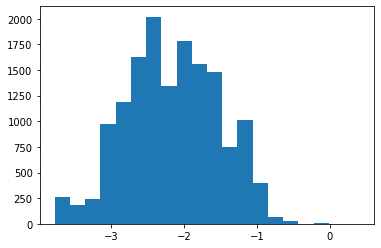

In [42]:
mkt_file = 'marketing.csv'
mkt_data = pd.read_csv(mkt_file)
mkt_data.head()
cat_fields = ['job', 'marital', 'education', 'default', 'housing', 'loan']
for field in cat_fields:
    mkt_data[field] = mkt_data[field].astype('category')

mkt_y = np.where(mkt_data['y'] == 'yes', 1.0 , 0.0)
mkt_data  = mkt_data.drop('y', axis=1)
mkt_data = pd.get_dummies(mkt_data)

X_train, X_test, y_train, y_test = \
    train_test_split(mkt_data, mkt_y, test_size=0.33, random_state=1)

clf = LogisticRegression(penalty='none').fit(X_train, y_train)

bins = 20

matplotlib.rcParams['figure.figsize'] = (6, 4)
y_hat_test = clf.predict(X_test)
test_probs = clf.predict_proba(X_test)[:,1]
test_scores = np.log(test_probs/(1.0 - test_probs))
plt.hist(test_scores, bins=bins)
plt.show()

(b)

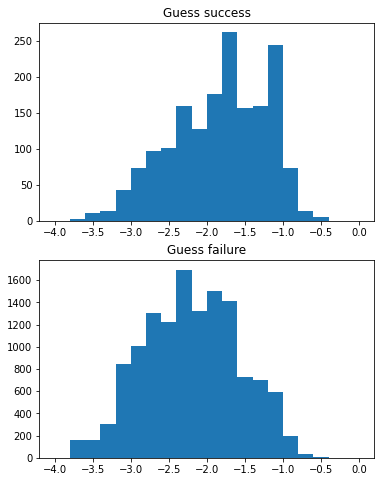

In [43]:
ones_scores  = test_scores[y_test == 1]
zeros_scores = test_scores[y_test == 0]



matplotlib.rcParams['figure.figsize'] = (6, 8)
fig, axs = plt.subplots(2, 1)
axs[0].set_title('Guess success')
axs[0].hist(ones_scores, range=[-4.0, 0.0], bins=bins)
axs[1].set_title('Guess failure')
axs[1].hist(zeros_scores, range=[-4.0, 0.0], bins=bins)
plt.show()


(c)

The true positve rate is $TPR(T) = \int_{T}^{\infty} f_1(x) dx $

The false positive rate is $FPR(T) = \int_{T}^{\infty} f_0(x) dx $

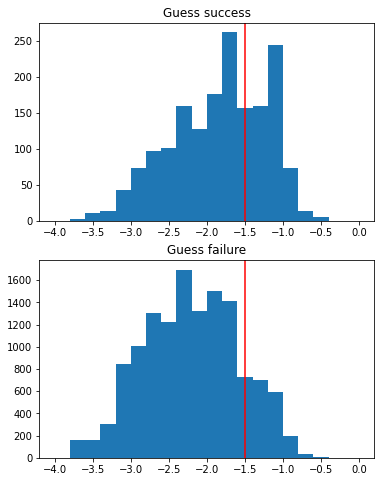

In [44]:
ones_scores = test_scores[y_test == 1]
zeros_scores = test_scores[y_test == 0]

matplotlib.rcParams['figure.figsize'] = (6, 8)
fig, axs = plt.subplots(2, 1)
axs[0].set_title('Guess success')
axs[0].hist(ones_scores, range=[-4.0, 0.0], bins=bins)
axs[0].axvline(-1.5, c='r')
axs[1].set_title('Guess failure')
axs[1].hist(zeros_scores, range=[-4.0, 0.0], bins=bins)
axs[1].axvline(-1.5, c='r')
plt.show()

Everything to the right of the red line on the top plot are the true positives and everything to the right of the red line on the bottom plot are the false positives

(d)

$ x = f(t) = FPR(t) = \int_{T}^{\infty} f_0(x) dx $

$ f^{'}(t) = f_0(t) $

$ y = g(t) = TPR(t) = \int_{T}^{\infty} f_1(x) dx $

as $t$ approaches $\infty$, $x$ and $y$ approach zero.

as $t$ approaches $-\infty$, $x$ and $y$ approach one.

Plugging the facts above into the equation outlined in the home work we have:

$ \int_{\infty}^{-\infty} g(t) f^{'}(t) dt = \int_{\infty}^{-\infty} \left ( \int_{\infty}^{t} f_1(x) dx \right) f_0(t) dt =  \int_{-\infty}^{\infty} \left ( \int_{t}^{\infty} f_1(x) dx \right) f_0(t) dt $

(e)

$ \int_{-\infty}^{\infty} \left ( \int_{t}^{\infty} f_1(x) dx \right) f_0(t) dt = 
\int_{-\infty}^{\infty} \left ( \int_{-\infty}^{\infty} \mathbb{1}_{x>t} f_1(x) dx \right) f_0(t) dt = 
\int_{-\infty}^{\infty} \mathbb{1}_{x>t} \left ( \int_{-\infty}^{\infty}  f_0(t) dt \right) f_1(x) dx$

The inside integral is a density so we have:

$\int_{-\infty}^{\infty} \mathbb{1}_{x>t}f_1(x) dx = \int_{t}^{\infty} f_1(x) dx = P(x > t) = P(S_1 > S_0)$

**Problem 2**

(a)

In [45]:
def eval_estimate(estimate, truth, loss_FP, loss_FN):
    num_tp = np.sum((estimate == True)  & (truth == True))
    num_fp = np.sum((estimate == True)  & (truth == False))
    num_tn = np.sum((estimate == False) & (truth == False))
    num_fn = np.sum((estimate == False) & (truth == True))
    
    sens = num_tp / (num_tp + num_fn)
    spec = num_tn / (num_tn + num_fp)
    loss = num_fp * loss_FP + num_fn * loss_FN
    
    return(sens, spec, loss)


loss_fp = 5
loss_fn = 100
threhshold = -1.0
guesses = test_scores > threhshold
print("eval:", eval_estimate(guesses, y_test, loss_fp, loss_fn))


eval: (0.053488372093023255, 0.9808333333333333, 164065)


(b)

In [46]:
unique_scores = np.sort(np.unique(test_scores))
num_us = len(unique_scores)
midpoints = (unique_scores[0:num_us-1] + unique_scores[1:num_us]) / 2.0

sens, spec, loss = np.vectorize( lambda x: eval_estimate(test_scores>x,
        np.array(y_test, dtype=bool), loss_fp, loss_fn))(midpoints)

(c)

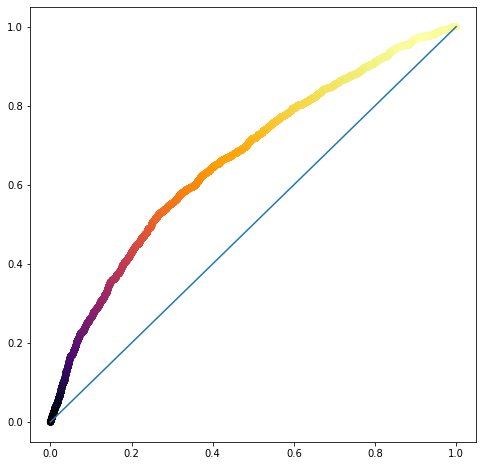

In [47]:
from matplotlib import cm #For nice colors
matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.scatter(1-spec, sens, c=-loss, cmap=cm.inferno)
plt.plot(sens, sens)
plt.show()

(d)

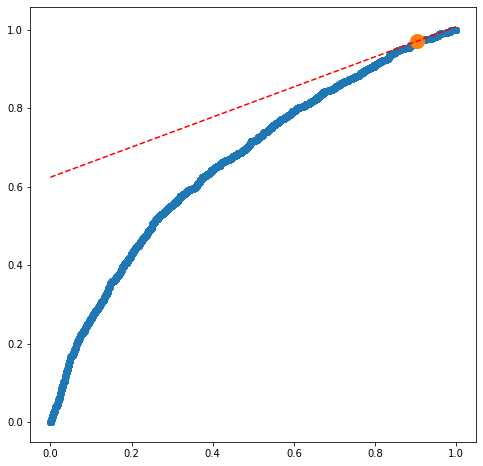

In [48]:
min_idx = np.argmin(loss)
min_loss = loss[min_idx]
min_loss_spec = spec[min_idx]
min_loss_sens = sens[min_idx]

num_pos = np.sum(y_test==1)
num_neg = np.sum(y_test==0)
slope = (num_neg / num_pos) * (loss_fp / loss_fn)
fpr = 1 - min_loss_spec
y = np.zeros(2)
y[0] = min_loss_sens - slope * fpr
y[1] = min_loss_sens + slope * (1 - fpr)

matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.scatter(1-spec, sens)
plt.scatter(1-min_loss_spec, min_loss_sens, s=200)
plt.plot([0, 1], y, '--', color='r')
plt.show()

(e)

i. $Loss(t) = N \times FPR(t) \times L_{FP} + P \times FNR(t) \times L_{FN}$

ii. $Loss(t) = N L_{FP} \int_{t}^{\infty} f_0(x)dx  + P L_{FN} \int_{-\infty}^t f_1(x) dx$

iii. $Loss^{'}(t) = -N L_{FP} f_0(t) + P L_{FN} f_1(t) $

Setting the derivative equal to zero we have:

$ N L_{FP} f_0(t) = P L_{FN} f_1(t) $

so 

$ \frac{f_1(t)}{f_0(t)} = \frac{N L_{FP}}{P L_{FN}} $

(f)



In [61]:
import math
opt_thresh = math.log(loss_fp / (loss_fp + loss_fn))
opt_loss_sens, opt_loss_spec, opt_loss = \
    eval_estimate(test_scores>opt_thresh, y_test, loss_fp, loss_fn)
print("optimal: ", opt_loss, opt_loss_spec, opt_loss_sens)
print("observed:", min_loss, min_loss_spec, min_loss_sens)

optimal:  64770 0.09742424242424243 0.9697674418604652
observed: 64695 0.09704545454545455 0.9703488372093023


(g)

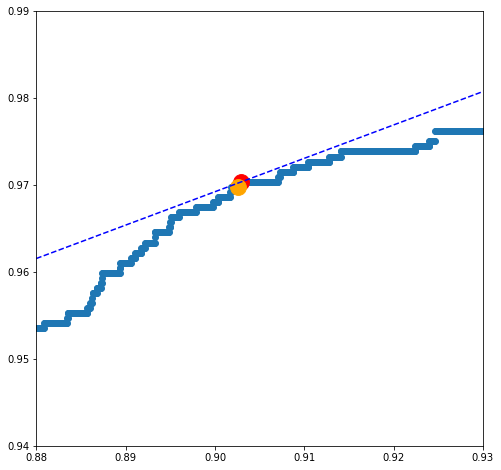

In [77]:
matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.scatter(1-spec, sens)
plt.scatter(1-min_loss_spec, min_loss_sens, color='red', s=250)
plt.scatter(1-opt_loss_spec, opt_loss_sens, color='orange', s=250)
plt.plot([0, 1], y, '--', color='b')
plt.xlim([.88, .93])
plt.ylim([.94, .99])
plt.show()

(h)

